In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from joblib import dump, load
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import seaborn as sns


In [72]:
df1 = pd.read_csv('2015.csv', sep = ",")
df1.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009
130,Malawi,Sub-Saharan Africa,131,4.292,0.06130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791
87,Portugal,Western Europe,88,5.102,0.04802,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996


In [73]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [74]:
df2 = pd.read_csv('2016.csv', sep = ",")
df2.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
46,Malaysia,Southeastern Asia,47,6.005,5.921,6.089,1.25142,0.88025,0.62366,0.39031,0.09081,0.41474,2.35384
12,United States,North America,13,7.104,7.020,7.188,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
111,Iraq,Middle East and Northern Africa,112,4.575,4.446,4.704,1.07474,0.59205,0.51076,0.24856,0.13636,0.19589,1.81657


In [75]:
df3 = pd.read_csv('2017.csv', sep = ",")
df3.sample(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
142,Benin,143,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631
14,Ireland,15,6.977,7.043352,6.910649,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388,1.773869
114,Senegal,115,4.535,4.601604,4.468396,0.479309,1.179692,0.409363,0.377922,0.183469,0.115460,1.789646
49,Belize,50,5.956,6.197242,5.714757,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956
77,Kosovo,78,5.279,5.364848,5.193152,0.951484,1.137854,0.541452,0.260288,0.319931,0.057472,2.010541


In [76]:
df4 = pd.read_csv('2018.csv', sep = ",")
df4.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
121,122,Egypt,4.419,0.885,1.025,0.553,0.312,0.092,0.107
103,104,Palestinian Territories,4.743,0.642,1.217,0.602,0.266,0.086,0.076
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302
10,11,United Kingdom,7.190,1.244,1.433,0.888,0.464,0.262,0.082
15,16,Belgium,6.927,1.324,1.483,0.894,0.583,0.188,0.240


In [77]:
df5 = pd.read_csv('2019.csv', sep = ",")
df5.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
48,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041
41,42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042
110,111,Senegal,4.681,0.450,1.134,0.571,0.292,0.153,0.072
125,126,Iraq,4.437,1.043,0.980,0.574,0.241,0.148,0.089


In [78]:
df1.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [79]:
df2.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [80]:
df3.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [81]:
df4.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [82]:
df5.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [83]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [86]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [87]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [88]:
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [89]:
df2.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [90]:
df3.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [91]:
df4.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [92]:
df5.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## DATA CLEANING

## Rename columns 2017, 2018, and 2019

In [93]:
df3.rename(columns={"Happiness.Rank" : "Happiness Rank", "Happiness.Score" : "Happiness Score", "Economy..GDP.per.Capita.":"Economy (GDP per Capita)", "Trust..Government.Corruption.":"Trust (Government Corruption)", "Dystopia.Residual":"Dystopia Residual", "Health..Life.Expectancy." : "Health (Life Expectancy)"}, inplace= True)
df4.rename(columns={"Score":"Happiness Score", "Country or region":"Country","Freedom to make life choices":"Freedom", "Healthy life expectancy":"Health (Life Expectancy)", "GDP per capita":"Economy (GDP per Capita)", "Social support":"Family", "Perceptions of corruption":"Trust (Government Corruption)"}, inplace= True)
df5.rename(columns={"Score":"Happiness Score", "Country or region":"Country","Freedom to make life choices":"Freedom", "Healthy life expectancy":"Health (Life Expectancy)", "GDP per capita":"Economy (GDP per Capita)", "Social support":"Family", "Perceptions of corruption":"Trust (Government Corruption)"}, inplace= True)

In [94]:
df3.sample(5)

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
38,Kuwait,39,6.105,6.191957,6.018043,1.632952,1.259699,0.632106,0.496338,0.228290,0.215160,1.640425
10,Israel,11,7.213,7.279853,7.146146,1.375382,1.376290,0.838404,0.405989,0.330083,0.085242,2.801757
89,Bosnia and Herzegovina,90,5.182,5.276336,5.087665,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173
72,Serbia,73,5.395,5.491570,5.298430,1.069318,1.258190,0.650785,0.208716,0.220126,0.040904,1.947084
121,India,122,4.315,4.371522,4.258478,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,1.519117


In [95]:
df4.sample(5)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
76,77,Portugal,5.410,1.188,1.429,0.884,0.562,0.055,0.017
125,126,Mauritania,4.356,0.557,1.245,0.292,0.129,0.134,0.093
133,134,Niger,4.166,0.131,0.867,0.221,0.390,0.175,0.099
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
138,139,Togo,3.999,0.259,0.474,0.253,0.434,0.158,0.101


In [96]:
df5.sample(5)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
72,73,Montenegro,5.523,1.051,1.361,0.871,0.197,0.142,0.080
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
78,79,Turkey,5.373,1.183,1.360,0.808,0.195,0.083,0.106
102,103,Congo (Brazzaville),4.812,0.673,0.799,0.508,0.372,0.105,0.093


In [97]:
df5.columns

Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

In [98]:
df2['Region'].value_counts()

Region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

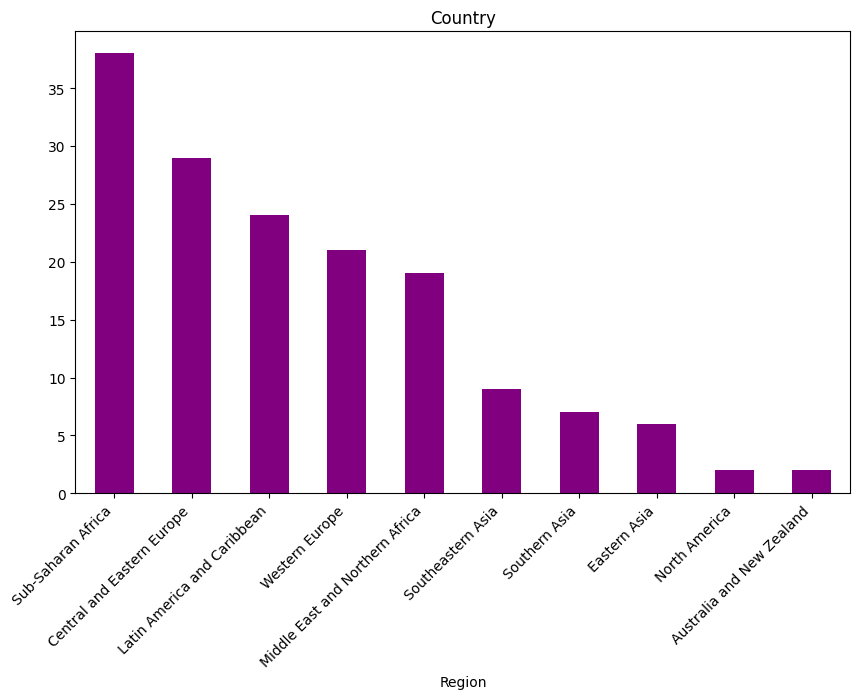

In [99]:
# Compute value counts of countries
World = df2['Region'].value_counts()

# Calculate the percentage of clients per country
porcentaje_clientes_por_pais = World / len(df5) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
World.plot(kind='bar', color='purple')
plt.title('Country')
plt.xticks(rotation=45, ha='right')

plt.show()


In [100]:
variables = ['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

In [101]:
datos_pca = df1.loc[:, variables]

In [102]:
datos_pca.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [103]:
datos_pca.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

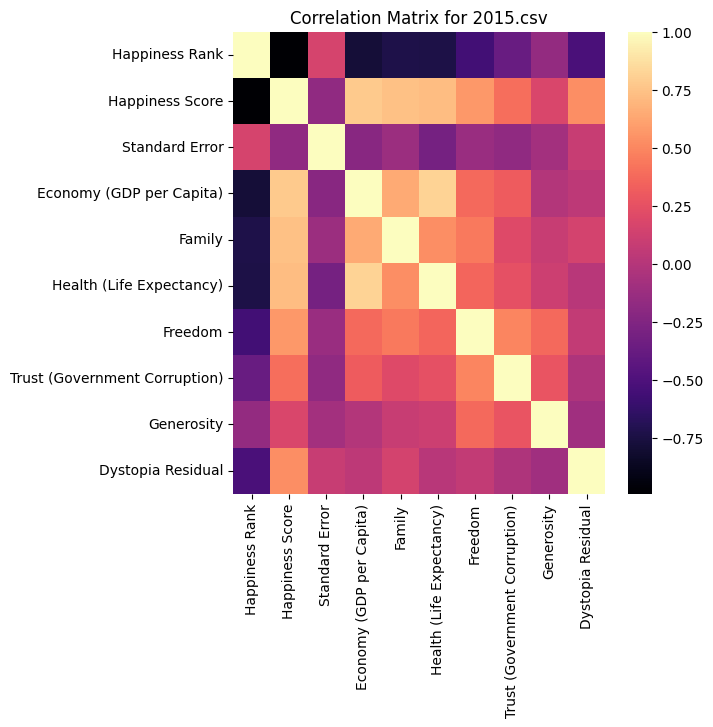

[[ 1.         -0.99210531  0.15851647 -0.78526692 -0.73364353 -0.73561296
  -0.55688609 -0.37231512 -0.16014157 -0.52199947]
 [-0.99210531  1.         -0.17725381  0.78096553  0.7406052   0.7241996
   0.5682109   0.39519858  0.18031853  0.53047352]
 [ 0.15851647 -0.17725381  1.         -0.21765082 -0.12072789 -0.31028686
  -0.12977324 -0.17832465 -0.08843875  0.08398094]
 [-0.78526692  0.78096553 -0.21765082  1.          0.64529939  0.816478
   0.37029971  0.3078852  -0.01046544  0.04005876]
 [-0.73364353  0.7406052  -0.12072789  0.64529939  1.          0.53110399
   0.44151821  0.20560511  0.08751324  0.14811704]
 [-0.73561296  0.7241996  -0.31028686  0.816478    0.53110399  1.
   0.36047653  0.24833468  0.10833522  0.01897932]
 [-0.55688609  0.5682109  -0.12977324  0.37029971  0.44151821  0.36047653
   1.          0.49352352  0.37391613  0.06278344]
 [-0.37231512  0.39519858 -0.17832465  0.3078852   0.20560511  0.24833468
   0.49352352  1.          0.2761227  -0.03310457]
 [-0.160141

In [104]:
# Create covariance matrix
corr_matrix = np.corrcoef(datos_pca.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt='.2f', xticklabels=datos_pca.columns, yticklabels=datos_pca.columns)

# Set plot title
plt.title('Correlation Matrix for 2015.csv')

# Show plot
plt.show()

print(corr_matrix)


In [108]:
variables_2 = [ 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']

In [111]:
datos_pca_2 = df2.loc[:, variables_2]

In [112]:
datos_pca_2.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [113]:
datos_pca_2.columns

Index(['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

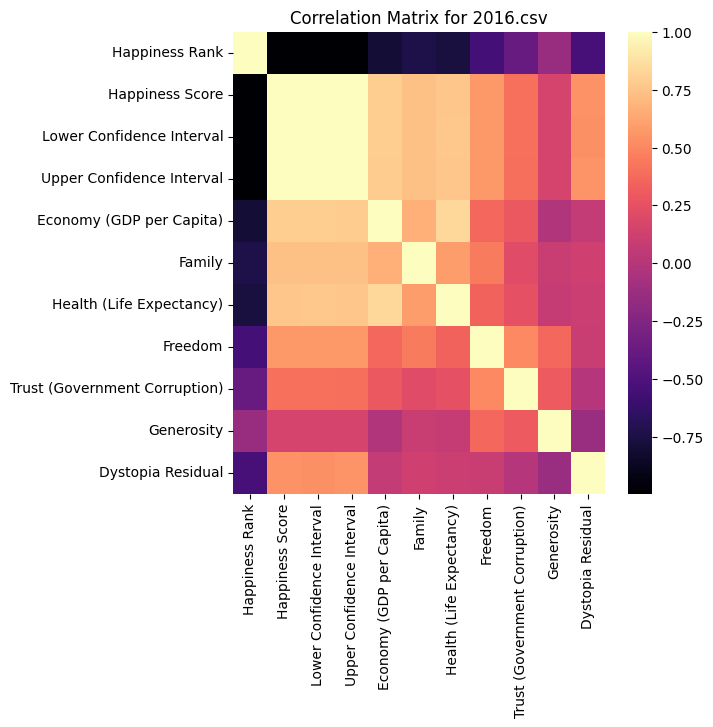

[[ 1.         -0.99574339 -0.99492838 -0.99552511 -0.79357712 -0.73327635
  -0.76799078 -0.55716871 -0.38710164 -0.14536878 -0.5426158 ]
 [-0.99574339  1.          0.99948487  0.99947434  0.79032202  0.73925158
   0.76538433  0.56682667  0.40203225  0.1568478   0.54373761]
 [-0.99492838  0.99948487  1.          0.99791901  0.7906734   0.74152274
   0.76917717  0.56685745  0.40483995  0.15802478  0.53879272]
 [-0.99552511  0.99947434  0.99791901  1.          0.78914037  0.73618406
   0.76075234  0.56620267  0.39877547  0.15549479  0.54816399]
 [-0.79357712  0.79032202  0.7906734   0.78914037  1.          0.66953969
   0.83706723  0.36228285  0.29418478 -0.02553066  0.06862402]
 [-0.73327635  0.73925158  0.74152274  0.73618406  0.66953969  1.
   0.58837678  0.4502082   0.21356094  0.08962885  0.11967231]
 [-0.76799078  0.76538433  0.76917717  0.76075234  0.83706723  0.58837678
   1.          0.34119929  0.24958329  0.07598731  0.10085705]
 [-0.55716871  0.56682667  0.56685745  0.56620267

In [114]:
# Create covariance matrix
corr_matrix = np.corrcoef(datos_pca_2.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt='.2f', xticklabels=datos_pca_2.columns, yticklabels=datos_pca_2.columns)

# Set plot title
plt.title('Correlation Matrix for 2016.csv')

# Show plot
plt.show()

print(corr_matrix)

In [143]:
df3.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')

In [144]:
variables_3 = ['Happiness Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual']

In [146]:
datos_pca_3 = df3.loc[:, variables_3]

In [147]:
datos_pca_3.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64

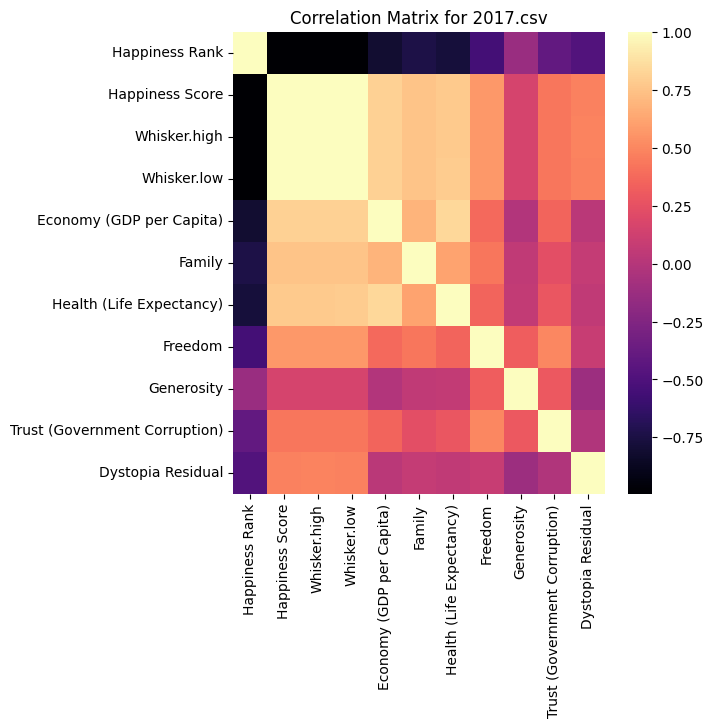

[[ 1.         -0.99277447 -0.99305849 -0.99153348 -0.81324364 -0.73675268
  -0.78071584 -0.55160784 -0.13261979 -0.40584233 -0.48450596]
 [-0.99277447  1.          0.99949742  0.99952041  0.81246875  0.75273667
   0.78195062  0.57013719  0.15525584  0.42907974  0.47535512]
 [-0.99305849  0.99949742  1.          0.99803641  0.81186758  0.75093422
   0.7766345   0.56990738  0.15546203  0.42645891  0.47882363]
 [-0.99153348  0.99952041  0.99803641  1.          0.81226748  0.75376686
   0.78638485  0.56980835  0.15490374  0.43122349  0.4715055 ]
 [-0.81324364  0.81246875  0.81186758  0.81226748  1.          0.68829631
   0.84307664  0.36987339 -0.01901125  0.3509441   0.02422642]
 [-0.73675268  0.75273667  0.75093422  0.75376686  0.68829631  1.
   0.61208006  0.42496576  0.05169263  0.23184139  0.07050576]
 [-0.78071584  0.78195062  0.7766345   0.78638485  0.84307664  0.61208006
   1.          0.34982679  0.06319149  0.27975198  0.05496328]
 [-0.55160784  0.57013719  0.56990738  0.56980835

In [149]:
# Create covariance matrix
corr_matrix = np.corrcoef(datos_pca_3.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt='.2f', xticklabels=datos_pca_3.columns, yticklabels=datos_pca_3.columns)

# Set plot title
plt.title('Correlation Matrix for 2017.csv')

# Show plot
plt.show()

print(corr_matrix)

In [150]:
df4.columns

Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

In [151]:
variables_4 = ['Overall rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)']

In [152]:
datos_pca_4 = df4.loc[:, variables_4]

In [157]:
for i in datos_pca_4.columns:
  datos_pca_4[datos_pca_4[i].isnull()]=datos_pca_4[i].mean()

C:\Users\samue\AppData\Local\Temp\ipykernel_1564\3229401316.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.112' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [158]:
datos_pca_4.isnull().sum()

Overall rank                     0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
dtype: int64

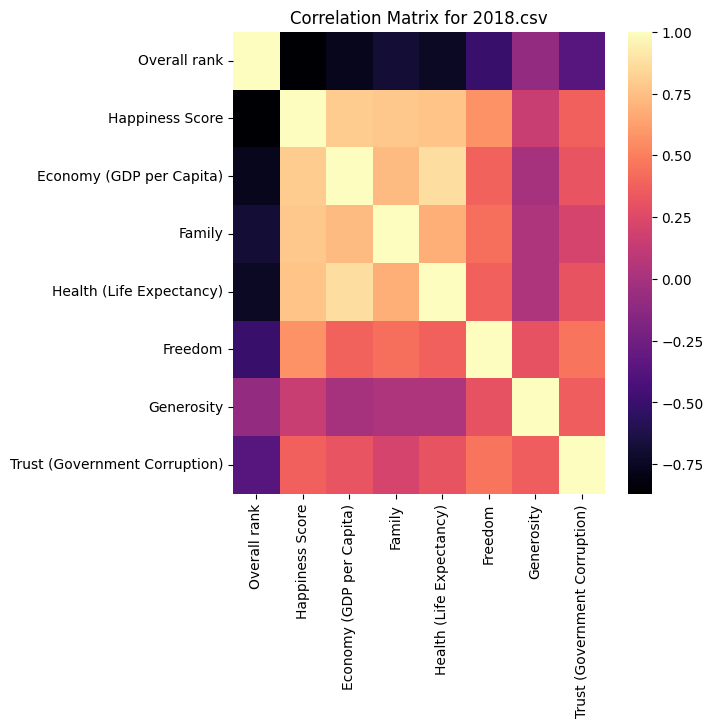

[[ 1.         -0.86957142 -0.76897042 -0.68174449 -0.74225765 -0.50832222
  -0.09479147 -0.36753075]
 [-0.86957142  1.          0.80122782  0.78771416  0.77340035  0.57347763
   0.14691126  0.37914443]
 [-0.76897042  0.80122782  1.          0.73507321  0.8689481   0.38295107
  -0.00347049  0.31543324]
 [-0.68174449  0.78771416  0.73507321  1.          0.68330127  0.43075613
   0.03384637  0.20947845]
 [-0.74225765  0.77340035  0.8689481   0.68330127  1.          0.37548045
   0.02905547  0.31175762]
 [-0.50832222  0.57347763  0.38295107  0.43075613  0.37548045  1.
   0.30409573  0.45590596]
 [-0.09479147  0.14691126 -0.00347049  0.03384637  0.02905547  0.30409573
   1.          0.36168039]
 [-0.36753075  0.37914443  0.31543324  0.20947845  0.31175762  0.45590596
   0.36168039  1.        ]]


In [159]:
# Create covariance matrix
corr_matrix = np.corrcoef(datos_pca_4.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt='.2f', xticklabels=datos_pca_4.columns, yticklabels=datos_pca_4.columns)

# Set plot title
plt.title('Correlation Matrix for 2018.csv')

# Show plot
plt.show()

print(corr_matrix)

In [160]:
df5.columns

Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

In [162]:
variables_5 = ['Overall rank','Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)']

In [163]:
datos_pca_5 = df5.loc[:, variables_5]

In [164]:
datos_pca_5.isnull().sum()


Overall rank                     0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
dtype: int64

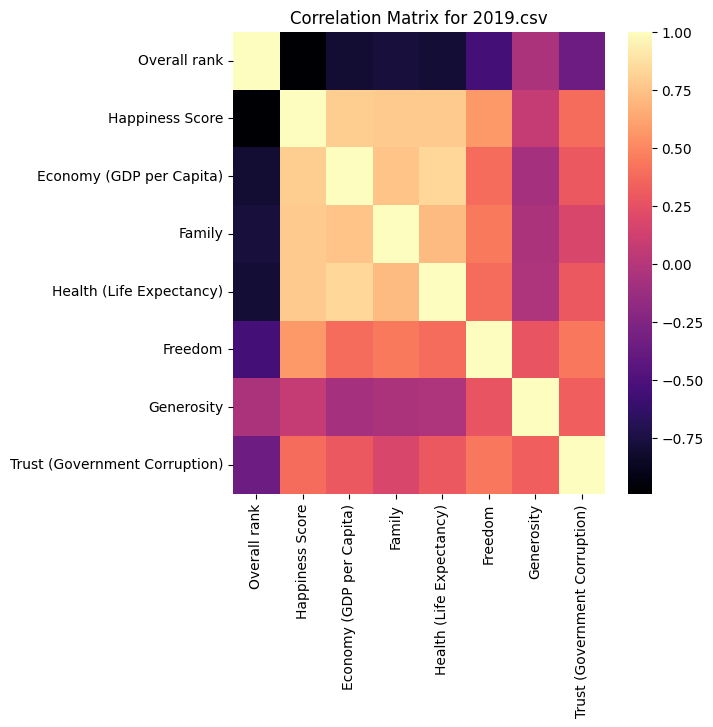

[[ 1.         -0.98909622 -0.80194654 -0.76746531 -0.78741066 -0.5466064
  -0.04799261 -0.35195851]
 [-0.98909622  1.          0.79388287  0.77705779  0.77988315  0.56674183
   0.07582369  0.38561307]
 [-0.80194654  0.79388287  1.          0.75490573  0.83546212  0.37907907
  -0.07966231  0.29891985]
 [-0.76746531  0.77705779  0.75490573  1.          0.71900946  0.44733316
  -0.04812645  0.18189946]
 [-0.78741066  0.77988315  0.83546212  0.71900946  1.          0.39039478
  -0.02951086  0.29528281]
 [-0.5466064   0.56674183  0.37907907  0.44733316  0.39039478  1.
   0.26974181  0.43884331]
 [-0.04799261  0.07582369 -0.07966231 -0.04812645 -0.02951086  0.26974181
   1.          0.32653754]
 [-0.35195851  0.38561307  0.29891985  0.18189946  0.29528281  0.43884331
   0.32653754  1.        ]]


In [165]:
# Create covariance matrix
corr_matrix = np.corrcoef(datos_pca_5.T)
# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt='.2f', xticklabels=datos_pca_5.columns, yticklabels=datos_pca_5.columns)

# Set plot title
plt.title('Correlation Matrix for 2019.csv')

# Show plot
plt.show()

print(corr_matrix)